In [1]:
import cv2
import os
import re
import matplotlib.pyplot as plt
import numpy as np
from paddleocr import PaddleOCR, draw_ocr

/home/kevinz/miniconda3/envs/chinese/lib/python3.10/site-packages/skimage/util/dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [2]:
base_dir = os.path.expanduser("~/Videos/chibi-maruko-chinese")
vid_file_names = os.listdir(base_dir)
vid_file_names = sorted(vid_file_names, key=lambda x: int(re.search("#\d+", x).group(0)[1:]))

In [3]:

for vfn in vid_file_names:
    vfp = f"{base_dir}/{vfn}"
    cap = cv2.VideoCapture(vfp)
    n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    h, w = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = cap.get(cv2.CAP_PROP_FPS)
    print(n_frames, fps)
    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        if ret == False:
            break 
        count += 1 
        if count > 5000:
            break 
    print(vfp)
    break

35213 25.0
/home/kevinz/Videos/chibi-maruko-chinese/櫻桃小丸子 #1 姐姐成日欺负我 [9y9FGfDrRy4].webm


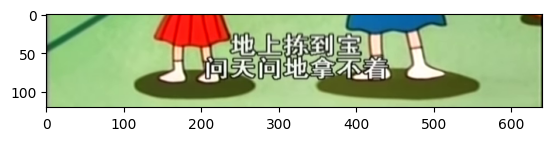

In [4]:
frame_clipped = frame[int(0.75 * h):, ...]
plt.figure()
plt.imshow(frame_clipped)
plt.show()

In [5]:
ocr = PaddleOCR(use_angle_cls=True, lang="ch")

[2022/12/31 19:44:32] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/kevinz/.paddleocr/whl/det/ch/ch_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/kevinz/.paddleocr/whl/rec/ch/ch_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_pat

In [22]:
result = ocr.ocr(frame_clipped)

RuntimeError: (PreconditionNotMet) Cannot load cudnn shared library. Cannot invoke method cudnnGetVersion.
  [Hint: cudnn_dso_handle should not be null.] (at /paddle/paddle/phi/backends/dynload/cudnn.cc:60)


In [16]:
llp = os.environ["LD_LIBRARY_PATH"]
os.environ["LD_LIBRARY_PATH"] = f"/home/kevinz/miniconda3/envs/chinese/lib:{llp}"